# Title: Heart Disease prediction

`Author` : [Zeeshan Younas]()\
`Dated` : 4 jan 2024\
Dataset : [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta_Data(About data)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
### Column Descriptions:
- `id `(Unique id for each patient)
- `age` (Age of the patient in years)
- `origin` (place of study)
- `sex` (Male/Female)
- `cp chest pain type` ([
    1.typical angina, 
    2. atypical angina,
    3. non-anginal,
    4. asymptomatic])
- `trestbps resting blood pressure `(resting blood pressure (in mm Hg on admission to the hospital))
- `chol `(serum cholesterol in mg/dl)
- `fbs` (if fasting blood sugar > 120 mg/dl)
- `restecg` (resting electrocardiographic results)
-- `Values:` [normal, stt abnormality, lv hypertrophy]
- `thalach:` maximum heart rate achieved
- `exang:` exercise-induced angina (True/ False)
- `oldpeak:` ST depression induced by exercise relative to rest
- `slope:` the slope of the peak exercise ST segment
- `ca:` number of major vessels (0-3) colored by fluoroscopy
- `thal:` [normal; fixed defect; reversible defect]
- `num:` the predicted attribute

### Acknowledgements
### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

***They would be:***

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:

We will fill this after doing some exploratory Data Analyis (EDA).

### Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.

In [136]:
# Import Libraries
# 01.To handle the data
import pandas as pd
import numpy as np
# 02.To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 03. To preprocess the data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer,KNNImputer

# 04. import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 05. Machine Learning Models
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
# 06.For classification task
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier,XGBRegressor
# 07. Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,mean_absolute_error,mean_squared_error,r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [137]:
# Read the data
df = pd.read_csv('heart_disease_uci.csv')

# print the first 5 rows
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis(EDA)
### Explore each column

In [138]:
# Explore the data of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [139]:
# check the shape
df.shape

(920, 16)

In [140]:
# id column
df['id'].min() , df['id'].max()

(1, 920)

In [141]:
# Age Column
df['age'].min() , df['age'].max()

(28, 77)

Mean of age column is :  53.51086956521739
Median of age column is :  54.0
Mode of age column is :  54


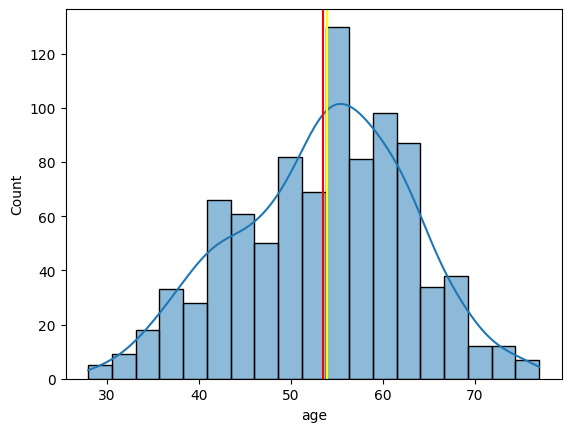

In [142]:
# Plot the median mode and mean of age column using sns
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red',label='Mean')
plt.axvline(df['age'].median(),color='green',label='Median')
plt.axvline(df['age'].mode()[0],color='yellow',label='Mode')

# Print the mean median and mode of age column
print('Mean of age column is : ',df['age'].mean())
print('Median of age column is : ',df['age'].median())
print('Mode of age column is : ',df['age'].mode()[0])


### Lets Explore the gender base distrubtion of the age column

In [143]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [144]:
# calculate the percentage of male and female values count in the data
male_values = 726
female_values = 194
total_count = male_values + female_values

# Calculate the percentage
male_percentage = (male_values/total_count)*100
female_percentage = (female_values/total_count)*100

# Display the percentage
print(f"Male percentage in the data : {male_percentage:.2f}%")
print(f"Female percentage in the data :{female_percentage:.2f}%")

# Difference  between male and female percentage
Difference_percentage = ((male_values - female_values)/ female_values) *100
print(f"Males are {Difference_percentage:.2f}% more then female data")


Male percentage in the data : 78.91%
Female percentage in the data :21.09%
Males are 274.23% more then female data


In [145]:
# Find the values count of age column  grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [146]:
# Plot the histrogram of age column using plotly and coloring the sex
fig = px.histogram(data_frame=df , x = 'age' , color = 'sex')
fig.show()

### Let's Explore the Data set column

In [147]:
# Lets deal with dataset column
# Find unique values of dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [148]:
# Find the values of `dataset` column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

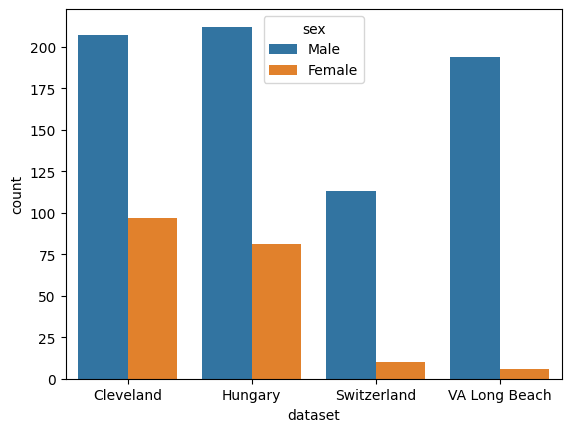

In [149]:
# Plot the countplot of dataset column
sns.countplot(data=df,x='dataset' , hue = 'sex')

# Make the plot using plotly
fig = px.bar(df , x='dataset', color = 'sex')
fig.show()

In [150]:
# Make a plot using plotly and coloring with dataset column
fig = px.histogram(df , x='age', color = 'dataset')
fig.show()

# print the mean median mode of age column grouped by data set
print(f"mean ofdata set{df.groupby('dataset')['age'].mean()}")
print('..................................................')
print(f"median ofdata set{df.groupby('dataset')['age'].median()}")
print('--------------------------------------------------')
print(f"mode ofdata set{df.groupby('dataset')['age'].agg(pd.Series.mode)}")


mean ofdata setdataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
..................................................
median ofdata setdataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
--------------------------------------------------
mode ofdata setdataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


### Let's Exlore the cp(Chest pain) column


In [151]:
# Find the values of cp column
df['cp'].value_counts()


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

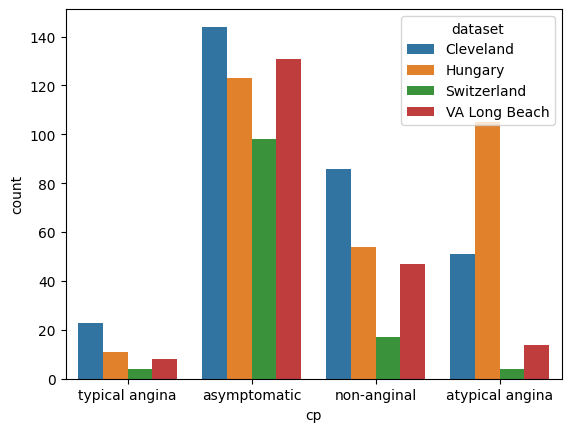

In [152]:
# Count plot of cp column by Dataset column
sns.countplot(data=df,x='cp',hue='dataset')

In [153]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(df , x='age', color = 'cp')
fig.show()

#### Let'e explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.

`Write here, what will happen if the blood pressure is high or low and then you can bin the data based on those values.`

In [154]:
# Find the values of trestbps column
df['trestbps'].value_counts().sum()

861

<Axes: xlabel='trestbps', ylabel='Count'>

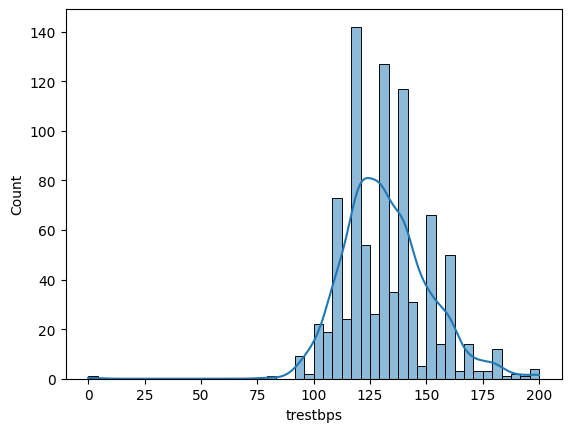

In [155]:
# Plot the histrogram of trestbps column
sns.histplot(df['trestbps'],kde=True)

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with missing values</span>

In [156]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [157]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']


In [158]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [159]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if len(df.columns) > 0:
        if col in categorical_cols:
            df[col] = impute_categorical_missing_data(col)
        elif col in numeric_cols:
            df[col] = impute_continuous_missing_data(col)
        else:
            pass


Missing Values trestbps : 6.41%
MAE = 13.12335260115607 

RMSE = 16.986319010486397 

R2 = 0.09910049286984957 

Missing Values chol : 3.26%
MAE = 45.28398876404494 

RMSE = 64.48503949397353 

R2 = 0.6705901465620366 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.13 accuracy

Missing Values thalch : 5.98%
MAE = 16.67514450867052 

RMSE = 21.703583332707268 

R2 = 0.3150605195929831 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5665116279069767 

RMSE = 0.7954362632148533 

R2 = 0.39720628132782143 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [160]:
# check categorical columns
df[categorical_cols].head()

,thal,ca,slope,exang,restecg,fbs,cp,sex,num
0,fixed defect,0.0,downsloping,False,lv hypertrophy,True,typical angina,Male,0
1,normal,3.0,flat,True,lv hypertrophy,False,asymptomatic,Male,2
2,reversable defect,2.0,flat,True,lv hypertrophy,False,asymptomatic,Male,1
3,normal,0.0,downsloping,False,normal,False,non-anginal,Male,0
4,normal,0.0,upsloping,False,lv hypertrophy,False,atypical angina,Female,0


<span style="color: Green; font-size: 350%; font-weight: bold;">Outliers</span>

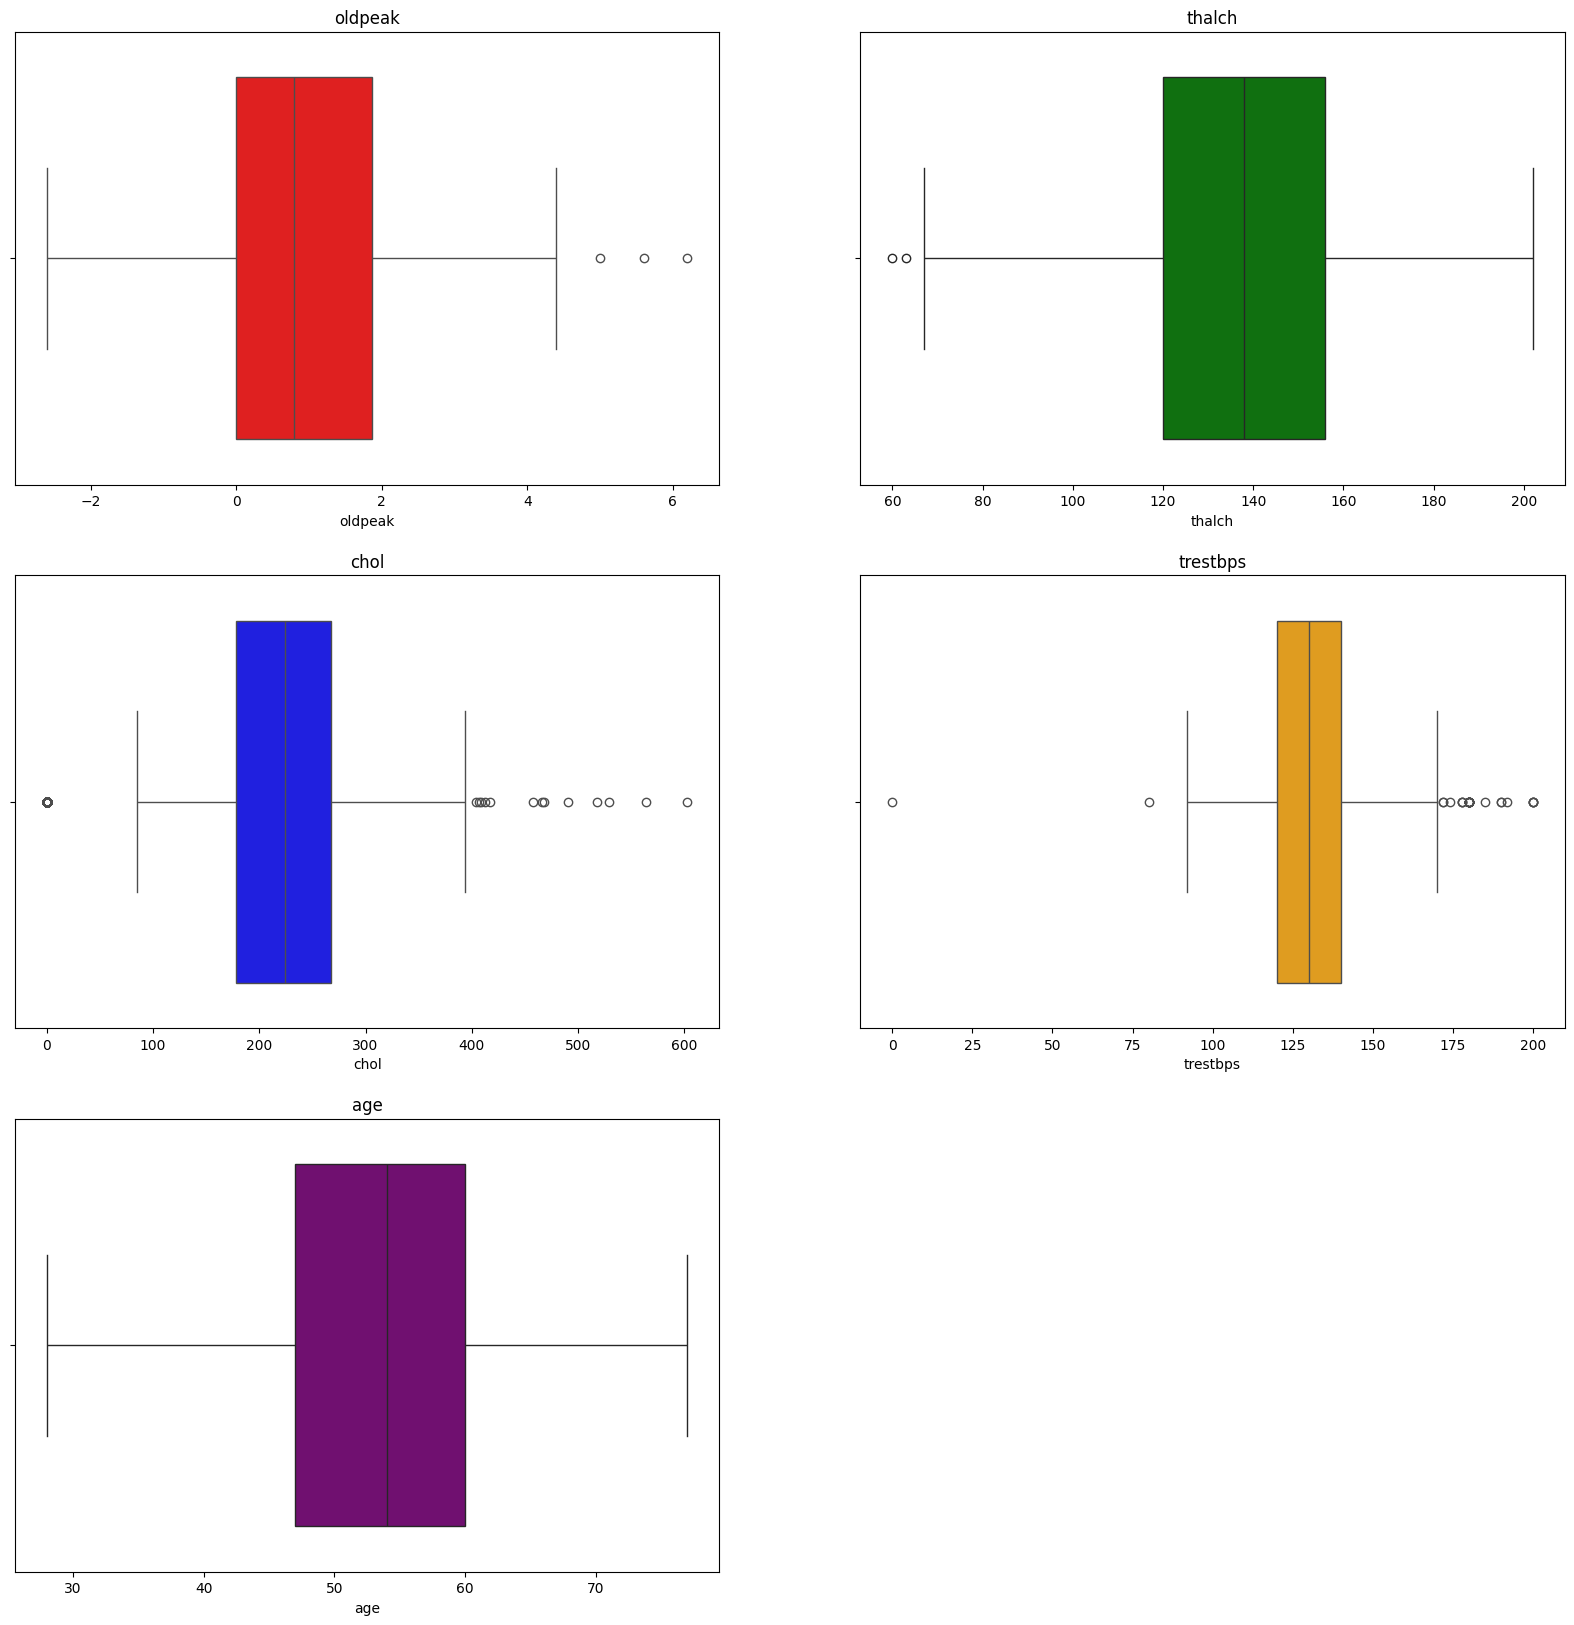

In [161]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

<span style="color: Green; font-size: 350%; font-weight: bold;">Feature scaling</span>

In [177]:
# Check the maximum values of numeric columns
print(df[numeric_cols].max())
print('..................................................')
# Check the minimum values of numeric columns
print(df[numeric_cols].min())



oldpeak       6.2
thalch      202.0
chol        603.0
trestbps    200.0
age          77.0
dtype: float64
..................................................
oldpeak     -2.6
thalch      60.0
chol         0.0
trestbps     0.0
age         28.0
dtype: float64


<span style="color: yellow; font-size: 350%; font-weight: bold;">Machine Learning</span>

In [174]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),{ 'n_estimators': [100, 150, 200]}),
    ('Support Vector Machine', SVC(random_state=42),{'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# # Retrieve the best model
# print("Best Model:", best_model)

# # save the best model
# import pickle
# pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

### Let's impute the missing values in thal column by using ML models

In [ ]:
# create a list of classifiers model and its hyperparameters to tune

classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42), {'n_estimators': [100, 150, 200]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42), {'n_estimators': [100, 150, 200], 'max_depth': [None, 5, 10, 15, 20]}),
    ('Support Vector Machine', SVC(random_state=42), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}),
    ('Logistic Regression', LogisticRegression(random_state=42), {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.1, 1, 10]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42), {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15, 20]}),
    ('Ada Boost', AdaBoostClassifier(random_state=42), {'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.1, 1, 10]}),
    ('XG Boost', XGBClassifier(random_state=42), {'n_estimators': [100, 150, 200], 'max_depth': [None, 5, 10, 15, 20]}),
    ('Naive Bayes', GaussianNB(), {'var_smoothing': [1e-09, 1e-08, 1e-07]})
]

# create a list of best models
best_models = []
best_accuracy = 0.0

# iterate over the classifiers and tune the hyperparameters
for name, classifier, params in classifiers:
    # create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', classifier)
    ])
    
    # create a grid search for each model
    grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs=-1)
    
    # fit the grid search on the training data
    grid_search.fit(X_train, y_train)
    
    # make predictions on the test data
    y_pred = grid_search.predict(X_test)
    
    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # print the performance metrics
    print("Model:", name)
    print("Best Parameters:", grid_search.best_params_)
    print("Test Accuracy:", accuracy)
    print()
    
    # check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_models.append(grid_search.best_estimator_)
    else:
        pass

### Let's Explore the Chol(cholesterol ) Column

#### Outputs:
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91%
5. Female Percentage in the data: 21.09%
6. Males are 274.23% more than females in the data.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
   1. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).
8. `Write down the observations here about mean, median and mode of age column, grouped by dataset column.`
9. `Write down the observation from cp column here.`